In [3]:
import matplotlib.pyplot as plt
import numpy as np

In [4]:
def perturb_and_plot_roots(base_poly, num_samples=100, stdev=1, hist2dbins=512):
    perturb = np.random.normal(
        size=(num_samples, base_poly.shape[0], 2),
        scale=stdev
    ).view(np.complex128)[:, :, 0]
    perturb[:, 0] = 0
    
    polys = base_poly + perturb
    
    roots = np.zeros((num_samples, base_poly.shape[0] - 1), dtype=np.complex128)
    for i in range(num_samples):
        roots[i] = np.roots(polys[i])
        
    plt.figure(figsize=(18,4))
    plt.subplot(1, 3, 1)
    root_radii = np.absolute(roots.flatten())
    plt.hist(
        root_radii,
        bins=256,
        range=(np.percentile(root_radii, 1) - 0.1, np.percentile(root_radii, 99) + 0.1),
        density=True,
    )
    plt.xlabel("radius")
    plt.title(f"deg={base_poly.shape[0] - 1}")

    plt.subplot(1, 3, 2)
    plt.hist(
        np.angle(roots.flatten()),
        bins=64,
        density=True,
    )
    plt.xlabel("angle")
    plt.title(f"deg={base_poly.shape[0] - 1}")

    plt.subplot(1, 3, 3)
    plt.hist2d(
        x=roots.flatten().real,
        y=roots.flatten().imag,
        bins=hist2dbins,
    )
    plt.axis('square')
    plt.xlim(-1.5, 1.5)
    plt.ylim(-1.5, 1.5)
    plt.title(f"deg={base_poly.shape[0] - 1}")

## Perturbing polynomial with random base coefficients except a_0
Again, increasing degree means radii concentrate around 1.

In [13]:
def rand_base_poly_no_constant(deg, stdev=1):
    poly = np.random.normal(size=(deg + 1, 2), scale=stdev).view(np.complex128)[:, 0]
    poly[0] = 1
    poly[-1] = 0
    return poly

print(np.poly1d(rand_base_poly_no_constant(deg=3, stdev=1)))

   3                      2
1 x + (0.1304 + 0.1078j) x + (0.8948 + 0.5623j) x


CPU times: user 2.65 s, sys: 13.9 ms, total: 2.66 s
Wall time: 2.67 s


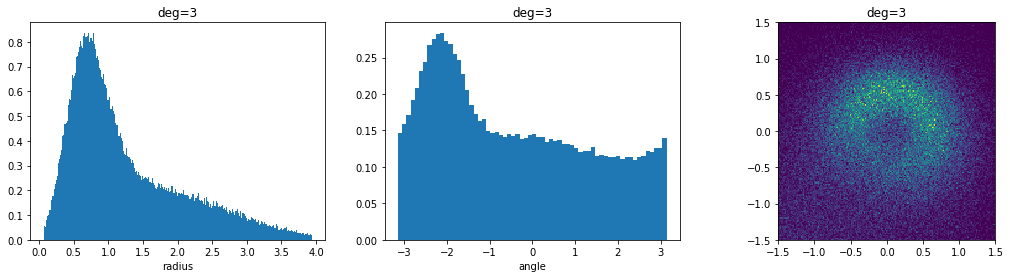

In [15]:
%%time
np.random.seed(42)
perturb_and_plot_roots(
    base_poly=rand_base_poly_no_constant(deg=3, stdev=1),
    num_samples=40000,
    hist2dbins=512,
)

CPU times: user 871 ms, sys: 15.2 ms, total: 886 ms
Wall time: 891 ms


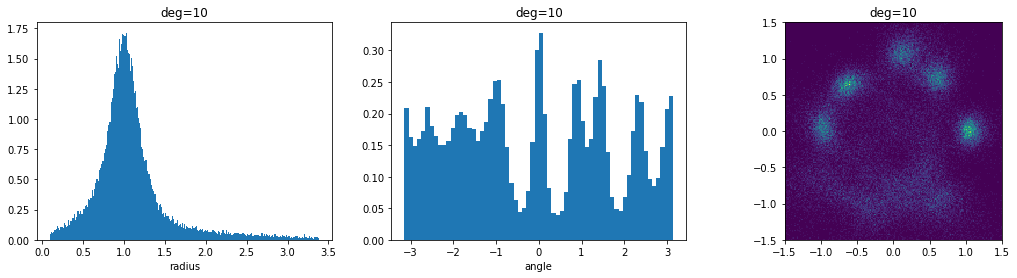

In [16]:
%%time
np.random.seed(42)
perturb_and_plot_roots(
    base_poly=rand_base_poly_no_constant(deg=10, stdev=1),
    num_samples=5000,
    hist2dbins=512,
)

CPU times: user 17.2 s, sys: 83.9 ms, total: 17.3 s
Wall time: 4.42 s


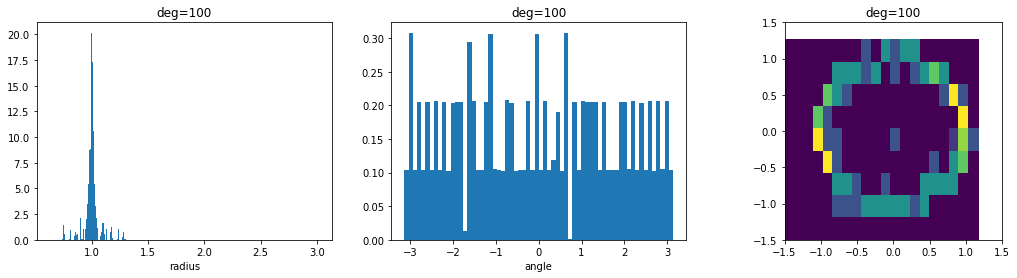

In [28]:
%%time
np.random.seed(42)
perturb_and_plot_roots(
    base_poly=rand_base_poly_no_constant(deg=100, stdev=100),
    num_samples=500,
    hist2dbins=512,
)

## Changing stdev doesn't change unit circle scaling

CPU times: user 3.37 s, sys: 81.1 ms, total: 3.46 s
Wall time: 3.46 s


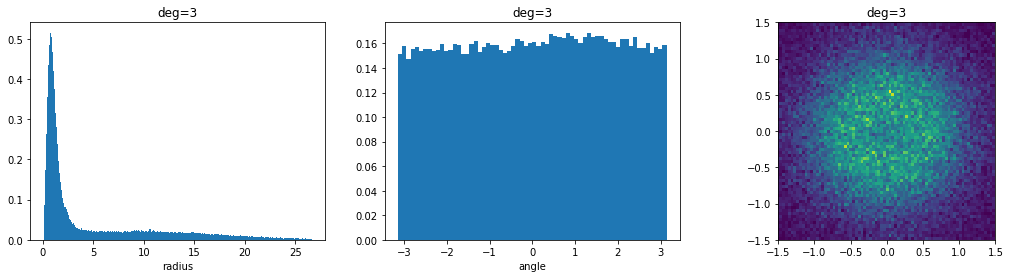

In [10]:
%%time
np.random.seed(42)
perturb_and_plot_roots(
    base_poly=poly_from_roots(
        np.random.normal(size=(3, 2), scale=0.5).view(np.complex128)[:, 0]
    ),
    num_samples=40000,
    hist2dbins=2048,
    stdev=10
)

CPU times: user 1.17 s, sys: 86.4 ms, total: 1.25 s
Wall time: 1.25 s


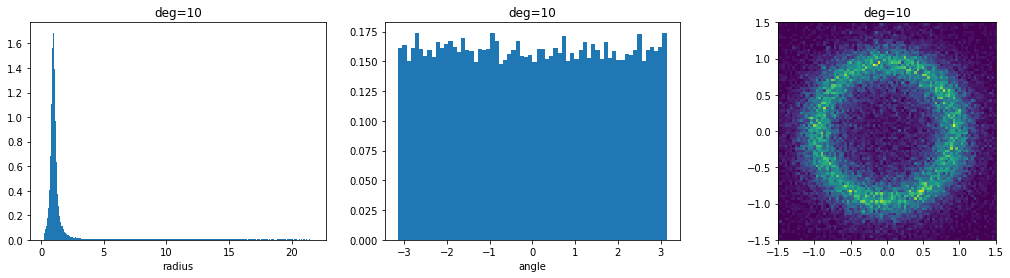

In [11]:
%%time
np.random.seed(42)
perturb_and_plot_roots(
    base_poly=poly_from_roots(
        np.random.normal(size=(10, 2), scale=0.5).view(np.complex128)[:, 0]
    ),
    num_samples=5000,
    hist2dbins=2048,
    stdev=10
)

CPU times: user 18.8 s, sys: 234 ms, total: 19 s
Wall time: 5.16 s


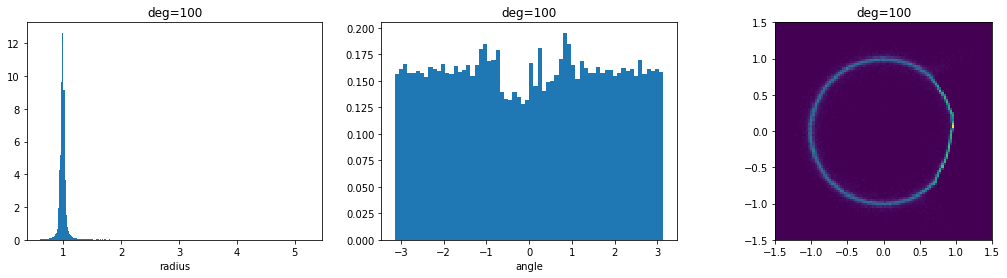

In [12]:
%%time
np.random.seed(42)
perturb_and_plot_roots(
    base_poly=poly_from_roots(
        np.random.normal(size=(100, 2), scale=0.5).view(np.complex128)[:, 0]
    ),
    num_samples=500,
    hist2dbins=2048,
    stdev=10,
)